# Fetal health prediction 


Descripiton of the classes in the datasest


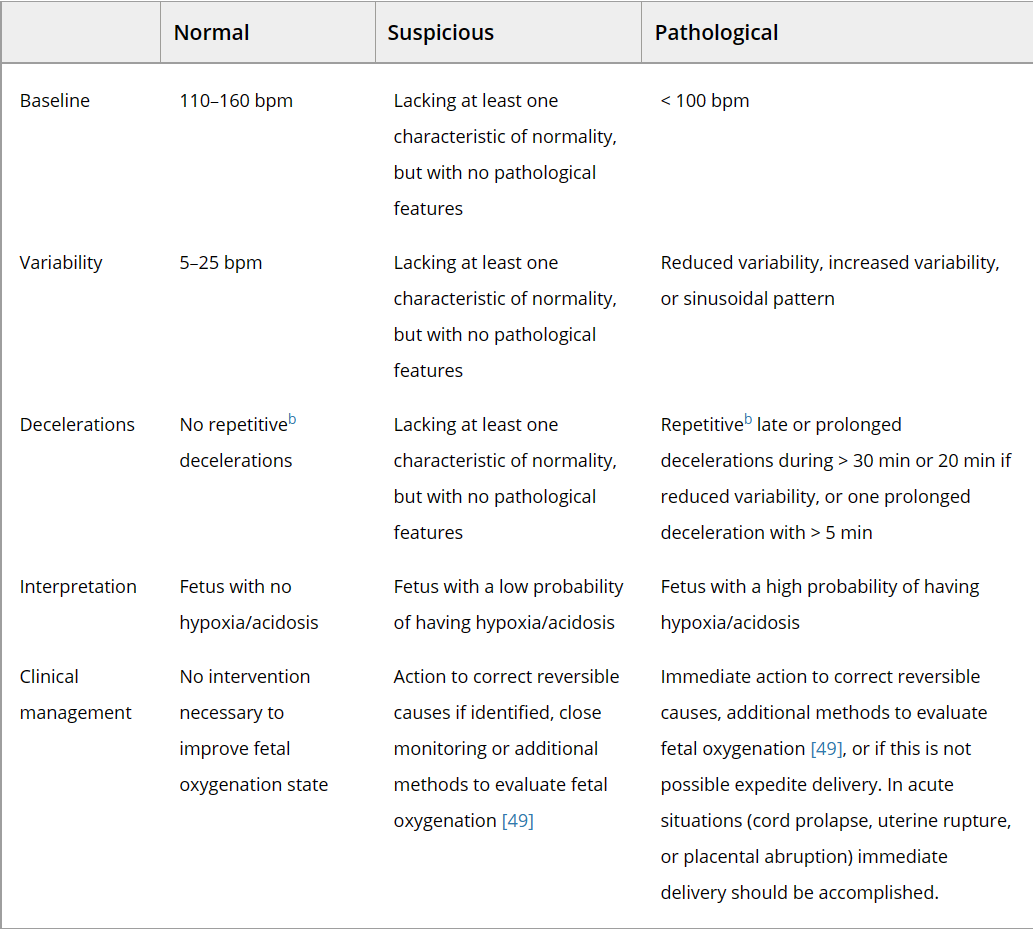

### Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
#fetal_risk.xls
df = pd.read_excel('/content/drive/MyDrive/fetal_risk.xls', sheet_name='Data')
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,22,Unnamed: 44,23
0,b,e,AC,FM,UC,DL,DS,DP,DR,NaN,...,E,AD,DE,LD,FS,SUSP,NaN,CLASS,NaN,NSP
1,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
2,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1


#### This section is to remove non feature coloumns from the dataset and keeping the attributes desired

In [ ]:
fetal_risk =df.drop(columns=df.columns[:10], inplace=False)


In [ ]:
fetal_risk.iloc[:, [35]]

,23
0,NSP
1,2
2,1
3,1
4,1
...,...
2125,2
2126,1
2127,NaN
2128,NaN


In [ ]:
fetal_risk = fetal_risk.drop(columns=fetal_risk.columns[21:35], inplace=False)

In [ ]:
fetal_risk

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,23
0,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120,0,0,0,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,140,0.000679,0,0.00611,0,0,0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
2126,142,0.001616,0.001616,0.008078,0,0,0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### next section is to remove rows that doesnt relate to the feature( strings and empty rows) and the ones that includes Nan values 

In [ ]:
null_values = fetal_risk.isnull().sum().sum()
print(null_values)


54


In [ ]:
row = fetal_risk.iloc[0]
print(row)

1           LB
2           AC
3           FM
4           UC
5           DL
6           DS
7           DP
8         ASTV
9         MSTV
10        ALTV
11        MLTV
12       Width
13         Min
14         Max
15        Nmax
16      Nzeros
17        Mode
18        Mean
19      Median
20    Variance
21    Tendency
23         NSP
Name: 0, dtype: object


In [ ]:
row = fetal_risk.iloc[2127:]
print(row)


       1    2         3         4         5         6         7    8    9   \
2127  NaN  NaN       NaN       NaN       NaN       NaN       NaN  NaN  NaN   
2128  NaN  NaN       NaN       NaN         0         0         0  NaN  NaN   
2129  NaN  NaN  0.480634  0.014925  0.015385  0.001353  0.005348   87    7   

       10  ...   13   14   15   16   17   18   19   20   21   23  
2127  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2128  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2129   91  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 22 columns]


In [ ]:
fetal_risk = fetal_risk.drop(fetal_risk.index[0])
fetal_risk = fetal_risk.drop(fetal_risk.index[2127:]) 


In [ ]:
fetal_risk = fetal_risk.drop(fetal_risk.index[2126])

In [ ]:
fetal_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       2126 non-null   object
 1   2       2126 non-null   object
 2   3       2126 non-null   object
 3   4       2126 non-null   object
 4   5       2126 non-null   object
 5   6       2126 non-null   object
 6   7       2126 non-null   object
 7   8       2126 non-null   object
 8   9       2126 non-null   object
 9   10      2126 non-null   object
 10  11      2126 non-null   object
 11  12      2126 non-null   object
 12  13      2126 non-null   object
 13  14      2126 non-null   object
 14  15      2126 non-null   object
 15  16      2126 non-null   object
 16  17      2126 non-null   object
 17  18      2126 non-null   object
 18  19      2126 non-null   object
 19  20      2126 non-null   object
 20  21      2126 non-null   object
 21  23      2126 non-null   object
dtypes: object(22)
memory usa

In [ ]:
null_values = fetal_risk.isnull().sum().sum()
print(null_values)


0


In [ ]:
fetal_risk.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,23
1,120,0,0,0,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


### assigning names to the columns of dataframe to make it clear:
1. LB	Fetal heart rate baseline (beats per minute)
2. AC	Number of accelerations per second
3. FM	Number of fetal movements per second
4. UC	Number of uterine contractions per second
5. DL	Number of light decelerations per second
6. DS	Number of severe decelerations per second
7. DP	Number of prolonged decelerations per second
8. ASTV	Percentage of time with abnormal short-term variability
9. MSTV	Mean value of short-term variability
10. ALTV	Percentage of time with abnormal long-term variability
11. 11MLTV	Mean value of long-term variability
12. Width	Width of FHR histogram
13. Min	Minimum of FHR histogram
14. Max	Maximum of FHR histogram
15. Nmax	Number of histogram peaks
16. Nzeros	Number of histogram zeroes
17. Mode	Histogram mode
18. Mean Hhistogram mean
19. Median	Histogram median
20. Variance	Histogram variance
21. Tendency	Histogram tendency
22. NSP	Fetal state class code (N=Normal, S=Suspected, P=Pathological)



In [ ]:
column_names = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']
print(len(column_names))
fetal_risk.columns = column_names

22


In [ ]:
fetal_risk.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120,0,0,0,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.00638,0,0.00638,0.00319,0,0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322,0,0.008306,0.003322,0,0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002561,0,0.007682,0.002561,0,0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.006515,0,0.008143,0,0,0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


#### Now will convert the object type to float type, to make it suitable for the machine learning model

In [ ]:
fetal_risk = fetal_risk.apply(lambda x: x.astype(float))


In [ ]:
fetal_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

#### the dataset is Ready for finding correlations in the feature and exploring, after preprocessing

In [ ]:
fetal_risk.describe().T 

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.000000,133.000000,140.000000,160.000000
AC,2126.0,0.003170,0.003860,0.0,0.000000,0.001630,0.005631,0.019284
FM,2126.0,0.009474,0.046670,0.0,0.000000,0.000000,0.002512,0.480634
UC,2126.0,0.004357,0.002940,0.0,0.001876,0.004482,0.006525,0.014925
DL,2126.0,0.001885,0.002962,0.0,0.000000,0.000000,0.003264,0.015385
DS,2126.0,0.000004,0.000063,0.0,0.000000,0.000000,0.000000,0.001353
DP,2126.0,0.000157,0.000580,0.0,0.000000,0.000000,0.000000,0.005348
ASTV,2126.0,46.990122,17.192814,12.0,32.000000,49.000000,61.000000,87.000000
MSTV,2126.0,1.332785,0.883241,0.2,0.700000,1.200000,1.700000,7.000000
ALTV,2126.0,9.846660,18.396880,0.0,0.000000,0.000000,11.000000,91.000000


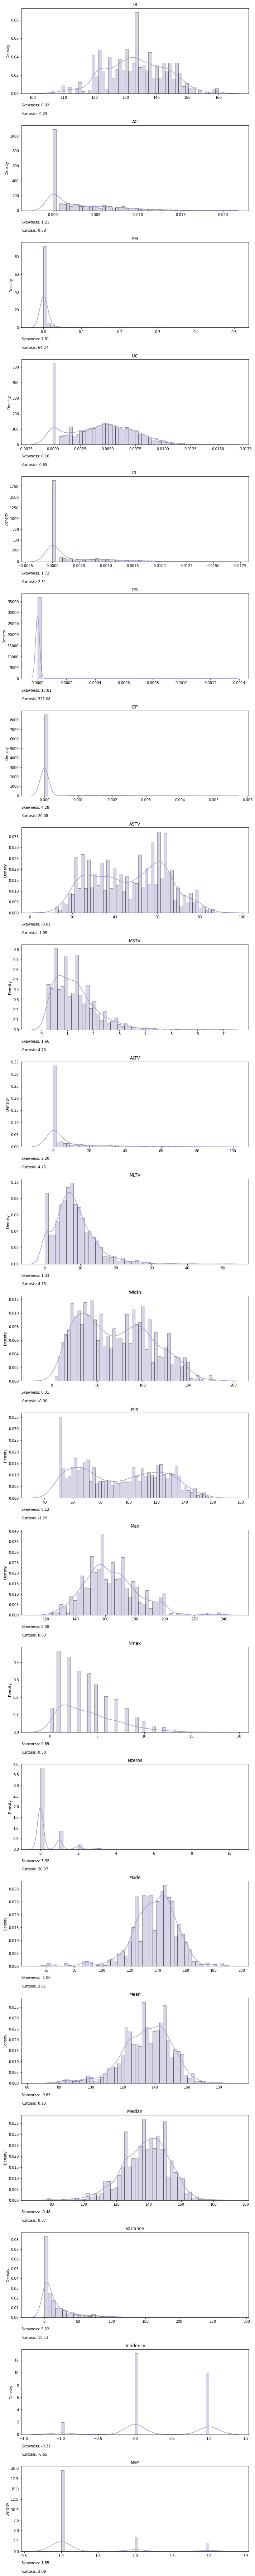

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="Specific warning message")

fig, axes = plt.subplots(nrows=len(fetal_risk.columns), ncols=1, figsize=(10,100))

colors = sns.color_palette('Purples', n_colors=1)

for i, column in enumerate(fetal_risk.columns):
    ax = sns.distplot(fetal_risk[column], ax=axes[i], color=(0.61, 0.60, 0.78), bins = 50, hist_kws={'edgecolor': 'black', 'linewidth': 1})
    ax.set_title(column)
    ax.text(0, -0.15, f"Skewness: {fetal_risk[column].skew():.2f}", transform=ax.transAxes)
    ax.text(0, -0.25, f"Kurtosis: {fetal_risk[column].kurt():.2f}", transform=ax.transAxes)
    ax.set_xlabel("")
    plt.tight_layout()
    
plt.show()



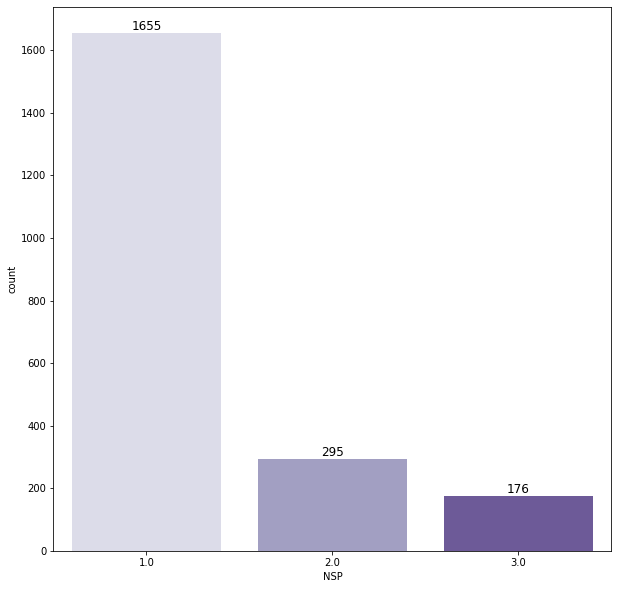

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(data=fetal_risk, x="NSP", palette='Purples')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

plt.show()


#### there is significant class imbalance 

In [ ]:
fetal_risk_focus = fetal_risk.drop(columns=['Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency'])
                  

#### removed the non original features for readability in the heatmap

In [ ]:
corr1 = fetal_risk_focus.corr(method='pearson')

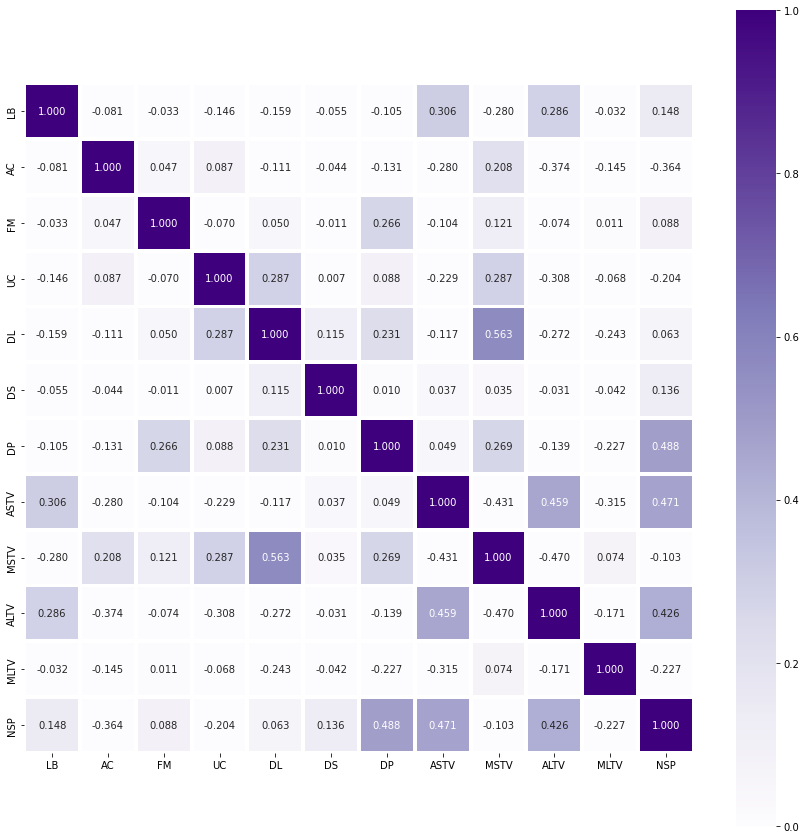

In [ ]:
f, ax = plt.subplots(figsize=(15,15))
ax1 = sns.heatmap(corr1, linewidths=3, fmt='.3f', annot=True,vmax=1, vmin=0, square=True, cmap='Purples')
plt.show()

In [ ]:
threshold = 0.4
correlated = corr1[(corr1 >= threshold) & (corr1 < 1)]
for i, j in correlated.items():
    for k, v in j[j.notnull()].items():
        print(f'{k} correlated to {i} by: {v:.2f}')


MSTV correlated to DL by: 0.56
NSP correlated to DP by: 0.49
ALTV correlated to ASTV by: 0.46
NSP correlated to ASTV by: 0.47
DL correlated to MSTV by: 0.56
ASTV correlated to ALTV by: 0.46
NSP correlated to ALTV by: 0.43
DP correlated to NSP by: 0.49
ASTV correlated to NSP by: 0.47
ALTV correlated to NSP by: 0.43


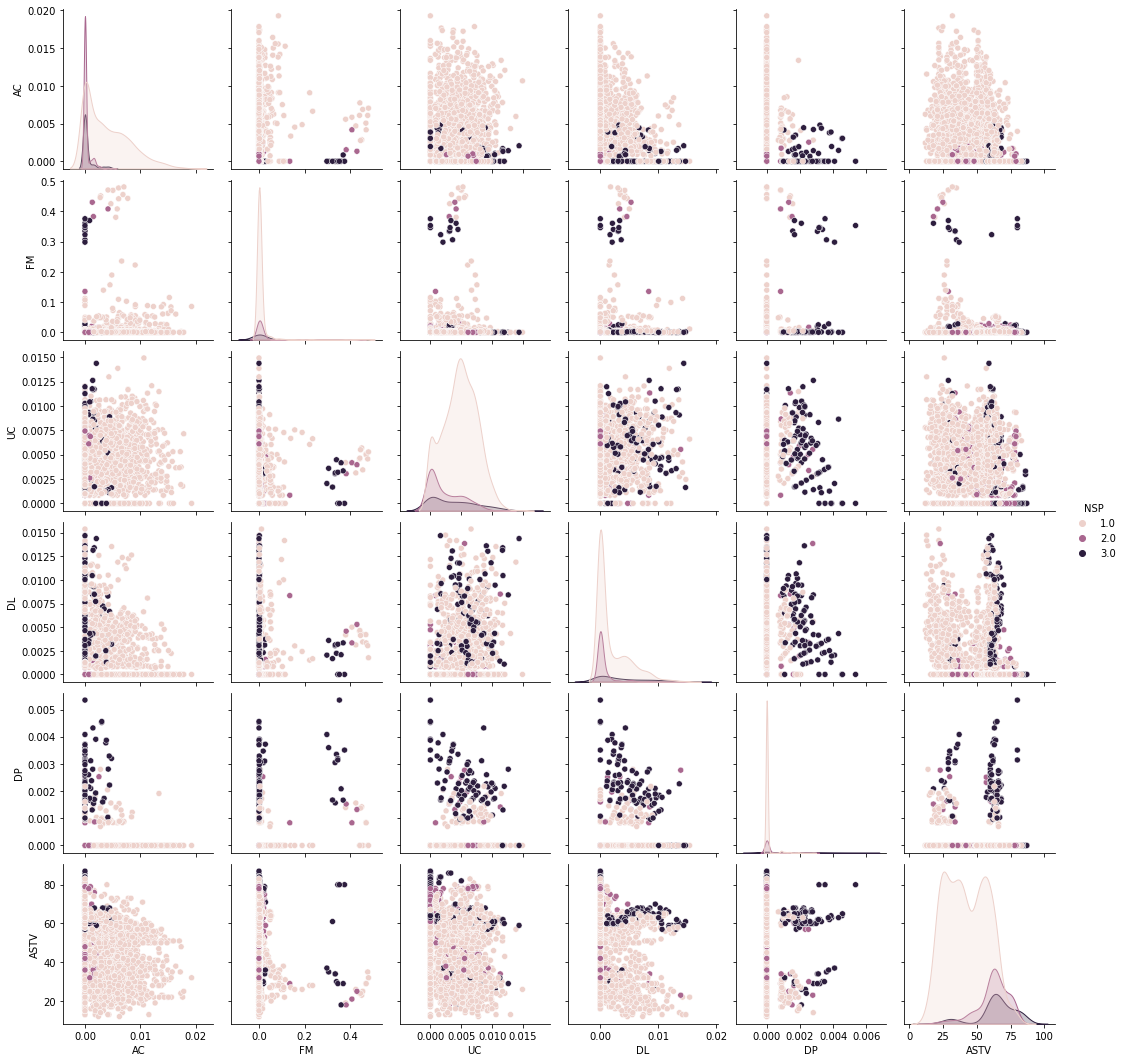

In [ ]:
sns.pairplot(fetal_risk[['AC', 'FM', 'UC', 'DL', 'DP', 'NSP', 'ASTV']], hue='NSP')
plt.show()

In [ ]:
X=fetal_risk.drop(["NSP"],axis=1)
y=fetal_risk["NSP"]

In [ ]:
from sklearn.preprocessing import StandardScaler
names = list(X.columns)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=names)  


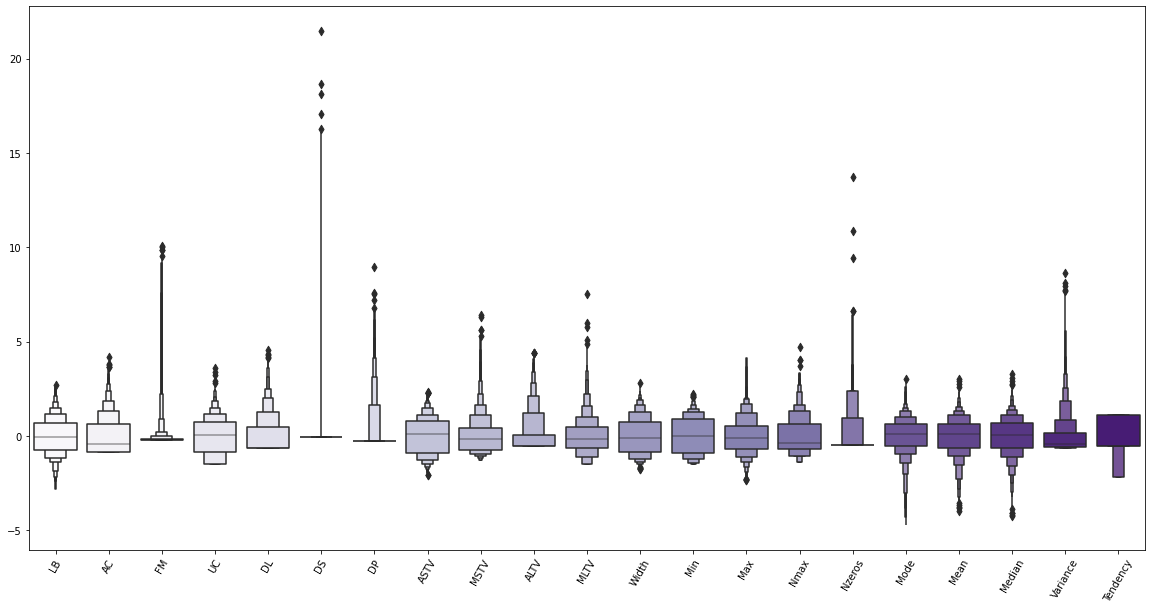

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled, palette="Purples")
plt.xticks(rotation=60)
plt.show()

 applying SMOTE to deal with the class imbalance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(logging_level='Silent')

model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Test score:", accuracy * 100)

Test score: 97.1802618328298


In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': metrics.Accuracy(),
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}

hpyer parameter tuning for the optimal learning rate, depth and l2_leaf_reg. using hyperopt.fmin function  which uses Bayesian optimisation.

In [ ]:
import hyperopt
from catboost import Pool, cv
from numpy.random import RandomState

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        eval_metric='Accuracy',
        random_seed=42,
        verbose=False,
        loss_function='MultiClass',
    )
    
    cv_data = cv(
        Pool(X_scaled, y),
        model.get_params(),
        logging_level='Silent',
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 15, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 0.9),
    'depth': hyperopt.hp.quniform('depth', 1, 15, 1),

}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=RandomState(123)
)

print(best)


100%|██████████| 50/50 [10:06<00:00, 12.14s/it, best loss: 0.04281391964461145]
{'depth': 7.0, 'l2_leaf_reg': 1.0, 'learning_rate': 0.31588479305817785}


applying the optimal parameters

In [ ]:
model = CatBoostClassifier(l2_leaf_reg = 1.0 , depth = 7.0, learning_rate =0.31588479305817785)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Test score:", accuracy * 100)

0:	learn: 0.7350807	total: 143ms	remaining: 2m 22s
1:	learn: 0.5719049	total: 212ms	remaining: 1m 45s
2:	learn: 0.4430341	total: 284ms	remaining: 1m 34s
3:	learn: 0.3626596	total: 347ms	remaining: 1m 26s
4:	learn: 0.3088689	total: 398ms	remaining: 1m 19s
5:	learn: 0.2676459	total: 450ms	remaining: 1m 14s
6:	learn: 0.2294174	total: 499ms	remaining: 1m 10s
7:	learn: 0.2091524	total: 536ms	remaining: 1m 6s
8:	learn: 0.1857562	total: 612ms	remaining: 1m 7s
9:	learn: 0.1706182	total: 675ms	remaining: 1m 6s
10:	learn: 0.1601225	total: 736ms	remaining: 1m 6s
11:	learn: 0.1554752	total: 803ms	remaining: 1m 6s
12:	learn: 0.1451324	total: 858ms	remaining: 1m 5s
13:	learn: 0.1364045	total: 905ms	remaining: 1m 3s
14:	learn: 0.1286132	total: 938ms	remaining: 1m 1s
15:	learn: 0.1193547	total: 966ms	remaining: 59.4s
16:	learn: 0.1143359	total: 1s	remaining: 58s
17:	learn: 0.1087748	total: 1.03s	remaining: 56.3s
18:	learn: 0.1056573	total: 1.06s	remaining: 54.8s
19:	learn: 0.1007381	total: 1.09s	remai

After the applying the optimal parameters, the model prediction improved slightly.

finding the most important features

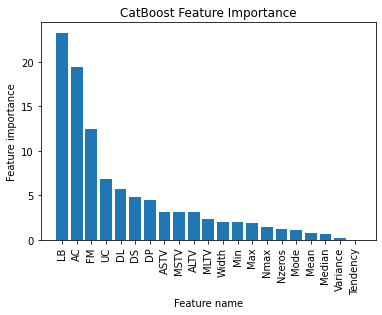

In [ ]:
importances = model.get_feature_importance()
sorted_importances = sorted(importances, reverse=True)
feature_names = model.feature_names_

plt.bar(range(X_train.shape[1]), sorted_importances)
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.xlabel('Feature name')
plt.ylabel('Feature importance')
plt.title('CatBoost Feature Importance')
plt.show()
